| [⬅️ Previous Session](practice_4-1_pandas.ipynb) | [🏠 Course Home](../index.ipynb)

# Session 5-1: Matplotlib 📈

![mpl](./assets/mpl.png)



**Don't forget to start your notebook with a cell containing the import statements you need for the session.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns

## 📚  <b> Practice 1. </b> 
Recreate the plot below. You do not need to match the colors exactly, but do not rely on <span class="codeb">matplotlib</span> defaults. Note: do not worry about the equation(s); these are included to indicate which functions to plot.

<img src="./assets/mpl_prac1.png" alt="prac1" width="600"/>

/var/folders/x9/sw65_mxs0zvb9zdbf_h1m2r40000gp/T/ipykernel_68964/1473776056.py:2: RuntimeWarning: divide by zero encountered in log
  ylog = np.log(x)


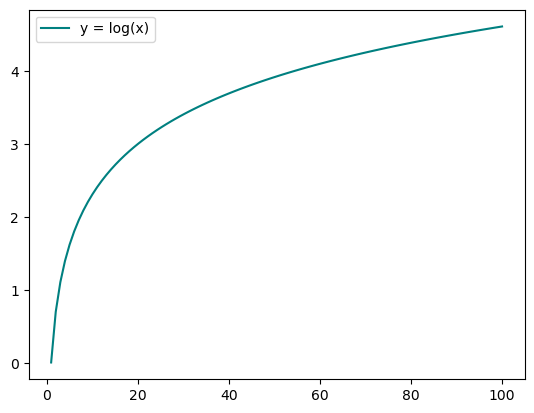

In [2]:
x = np.linspace(0,100,100)
ylog = np.log(x)

plt.plot(x,ylog, color = 'teal')
plt.legend(labels=['y = log(x)'])

## 📚  <b> Practice 2. </b> 
Recreate the plot below. You do not need to match the colors exactly, but do not rely on <span class="codeb">matplotlib</span> defaults. Note: do not worry about the equation(s); these are included to indicate which functions to plot.

<img src="./assets/mpl_prac2.png" alt="prac2" width="600"/>

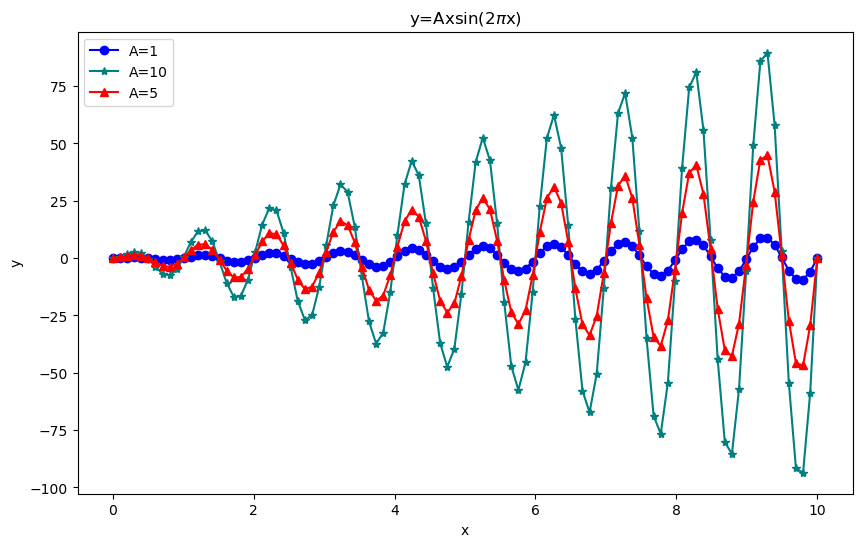

In [3]:
x = np.linspace(0, 10, 100)
y1 = 1 * x* np.sin(2*np.pi*x)
y2 = 10 * x * np.sin(2*np.pi*x)
y3 = 5 * x * np.sin(2*np.pi*x)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y1, label='A=1', marker='o', color='blue')
ax.plot(x, y2, label='A=10', marker='*', color='teal')
ax.plot(x, y3, label='A=5', marker='^', color='red')
ax.set_title('y=Axsin(2$\pi$x)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()


## 📚  <b> Practice 3. </b> 

Import the data from `./data/BSRN_data.csv` and plot the temperature and relative humidity over the month of October 2019 at the BSRN station. Be sure to format the timestamps and include axis labels, a title, and a legend, if necessary.



In [4]:
bsrn = pd.read_csv('./data/BSRN_GOB_2019-10.csv')
bsrn['DATE'] = pd.to_datetime(bsrn.DATE)  # Note: overwriting a column like this is NOT recommended.

[Text(18170.0, 0, '01-Oct-19'),
 Text(18174.0, 0, '05-Oct-19'),
 Text(18178.0, 0, '09-Oct-19'),
 Text(18182.0, 0, '13-Oct-19'),
 Text(18186.0, 0, '17-Oct-19'),
 Text(18190.0, 0, '21-Oct-19'),
 Text(18194.0, 0, '25-Oct-19'),
 Text(18198.0, 0, '29-Oct-19'),
 Text(18201.0, 0, '01-Nov-19')]

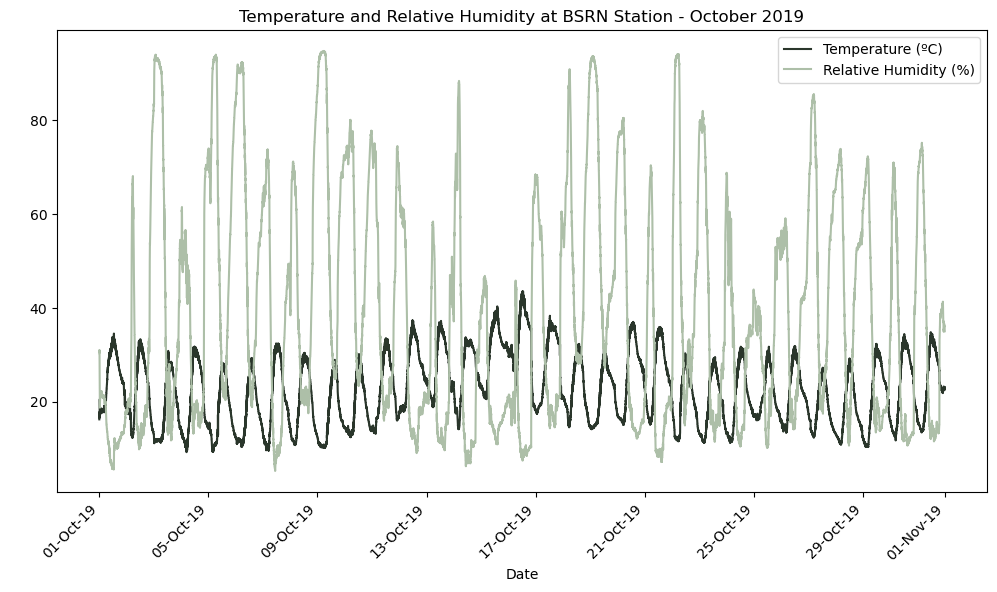

In [5]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1,1,1)

sns.lineplot(data = bsrn,
             x = 'DATE',
             y = 'T_degC',
             label = 'Temperature (ºC)',
             color = '#2a362b')
sns.lineplot(data = bsrn,
             x = 'DATE',
             y = 'RH',
             label = 'Relative Humidity (%)',
             color = '#adbfa8')
plt.title("Temperature and Relative Humidity at BSRN Station - October 2019")
plt.xlabel("Date")
plt.ylabel(" ")
plt.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y')) # b is month but as a short string eg. 10 is Oct.
plt.setp(ax.get_xticklabels(), rotation=45, fontsize=10, ha='right')
ax.get_xticklabels()


## 📚 Practice 4.

Saturation vapor pressure, \( $ e^*(T_a) $ \), is the maximum pressure of water vapor that can exist in equilibrium above a flat plane of water at a given temperature. It can be calculated from the Tetens equation:

$$ e^{*}(T_{a}) = a \times exp({\frac{b \cdot T_{a}}{T_{a} + c}}) $$

where $ T_a $ is the air temperature in °C, $ a = 0.611  $ kPa,  $ b = 17.502  $, and  $ c = 240.97 °C  $.

1. Calculate \( $ e^*(T_a) $ \) in kPa for all temperatures in `bsrn`.
1. Plot temperature vs. saturation vapor pressure for the BSRN station. Be sure to format your plot appropriately and include axis labels, a title, and a legend, if necessary.
1. Compare your plot to Figure 3-1 in Campbell and Norman (1998), included below. Do they look more or less the same?

![cn](./assets/campbell_norman_fig3-1.png)


In [6]:
bsrn['SVP'] = 0.611 * np.exp((17.502*bsrn['T_degC'])/(bsrn['T_degC']+240.97))

Text(0.13, -0.005, 'FIGURE 3-1. Saturation vapor pressure of air as a function of temperature')

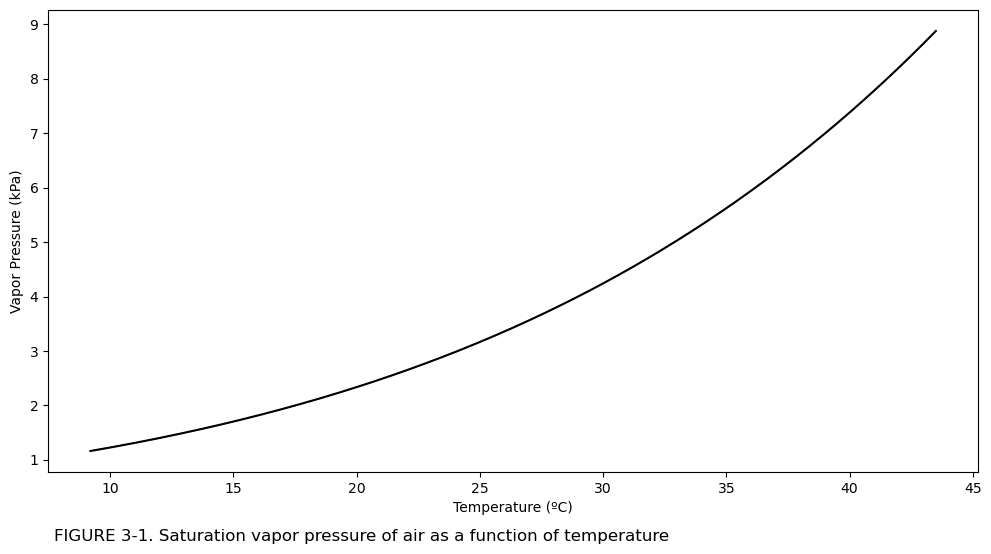

In [9]:
fig2 = plt.figure(figsize=(12,6))

sns.lineplot(data = bsrn,
         x = 'T_degC',
         y = 'SVP',
         color = 'black')
plt.xlabel("Temperature (ºC)")
plt.ylabel("Vapor Pressure (kPa)")
txt = ('FIGURE 3-1. Saturation vapor pressure of air as a function of temperature')
plt.figtext(0.13, -0.005, txt, wrap=True, fontsize=12)


## 📚  <b> Practice 5. </b> 
The difference between saturation vapor pressure and ambient air pressure is called vapor pressure deficit, $\textit{VPD}$. $\textit{VPD}$ can be calculated from saturation vapor pressure and relative humidity, $h_r$, as follows:
$$ \textit{VPD} \, = \, e^*(T_a) \cdot (1 \, - \, h_r)$$
where $h_r$ is expressed as a fraction.

1. Calculate the vapor pressure deficit for the BSRN data.
1. Calculate the mean hourly $RH$ and $\textit{VPD}$ over the entire month.
1. Plot $RH$ and $\textit{VPD}$ as a function of time of day. (for extra python points, try plotting both variables on one plot using [ax.twinx()](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html))
1. How does relative humidity vary throughout the day? Why?
1. Compare your plot(s) to Figure 3-3 in Campbell and Norman (1998). How do the values of $e^*(T_a)$ and $\textit{VPD}$ for the BSRN station compare to those at constant vapor pressure in Figure 3-3?

![cn](./assets/campbell_norman_fig3-3.png)


In [25]:
bsrn['VPD'] = (bsrn['SVP']) * (1 - (bsrn['RH']/100))

In [26]:
# Mean hourly VPD and RH 
bsrn_vpd = bsrn[['DATE', 'SVP', 'RH', 'VPD', "T_degC"]]
bsrn_vpd['DATE'] = pd.to_datetime(bsrn_vpd['DATE'])
bsrn_vpd.set_index('DATE', inplace=True)

bsrn_vpd_summary = bsrn_vpd.reset_index().groupby(pd.Grouper(key='DATE', freq='H')).mean()

/var/folders/x9/sw65_mxs0zvb9zdbf_h1m2r40000gp/T/ipykernel_68964/3382484466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bsrn_vpd['DATE'] = pd.to_datetime(bsrn_vpd['DATE'])


[Text(18170.0, 0, '01-Oct-19'),
 Text(18174.0, 0, '05-Oct-19'),
 Text(18178.0, 0, '09-Oct-19'),
 Text(18182.0, 0, '13-Oct-19'),
 Text(18186.0, 0, '17-Oct-19'),
 Text(18190.0, 0, '21-Oct-19'),
 Text(18194.0, 0, '25-Oct-19'),
 Text(18198.0, 0, '29-Oct-19'),
 Text(18201.0, 0, '01-Nov-19')]

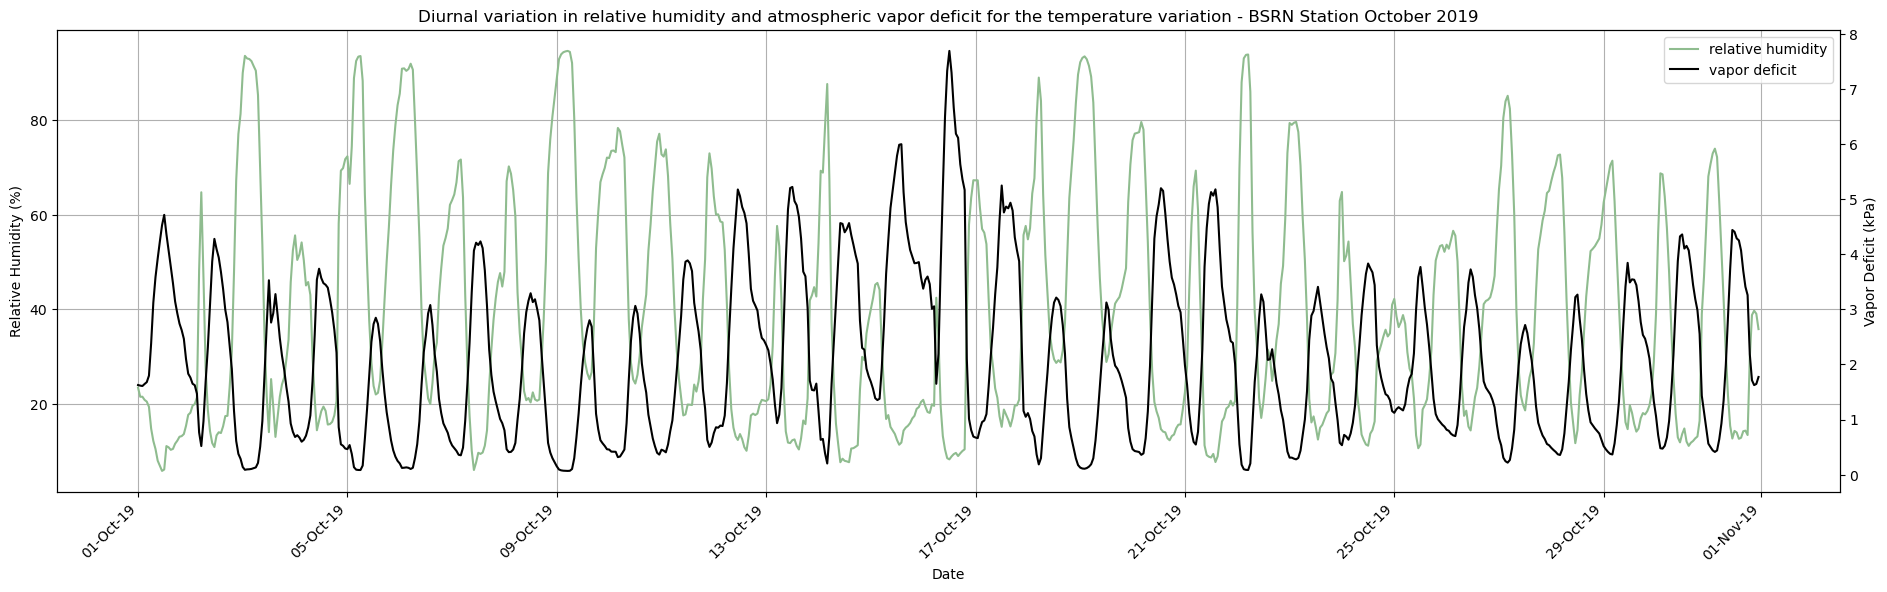

In [27]:
bsrn_vpd_summary = bsrn_vpd_summary.reset_index()

fig3 = plt.figure(figsize=(23,6))


ax = fig3.add_subplot(111)
ln1 = ax.plot(bsrn_vpd_summary['DATE'], bsrn_vpd_summary['RH'], '-', color = 'darkseagreen', label = 'relative humidity')
ax2 = ax.twinx()
ln2 = ax2.plot(bsrn_vpd_summary['DATE'], bsrn_vpd_summary['VPD'], '-', color = 'black', label = 'vapor deficit')

lns = ln1+ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

ax.grid()
ax.set_xlabel("Date")
ax.set_ylabel("Relative Humidity (%)")
ax2.set_ylabel("Vapor Deficit (kPa)")
plt.title("Diurnal variation in relative humidity and atmospheric vapor deficit for the temperature variation - BSRN Station October 2019")

# Format timestamps
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
plt.setp(ax.get_xticklabels(), rotation=45, fontsize=10, ha='right')
ax.get_xticklabels()

In [28]:
bsrn_vpd_hour = bsrn_vpd_summary.tail(24)

[Text(18200.0, 0, '00'),
 Text(18200.125, 0, '03'),
 Text(18200.25, 0, '06'),
 Text(18200.375, 0, '09'),
 Text(18200.5, 0, '12'),
 Text(18200.625, 0, '15'),
 Text(18200.75, 0, '18'),
 Text(18200.875, 0, '21'),
 Text(18201.0, 0, '00')]

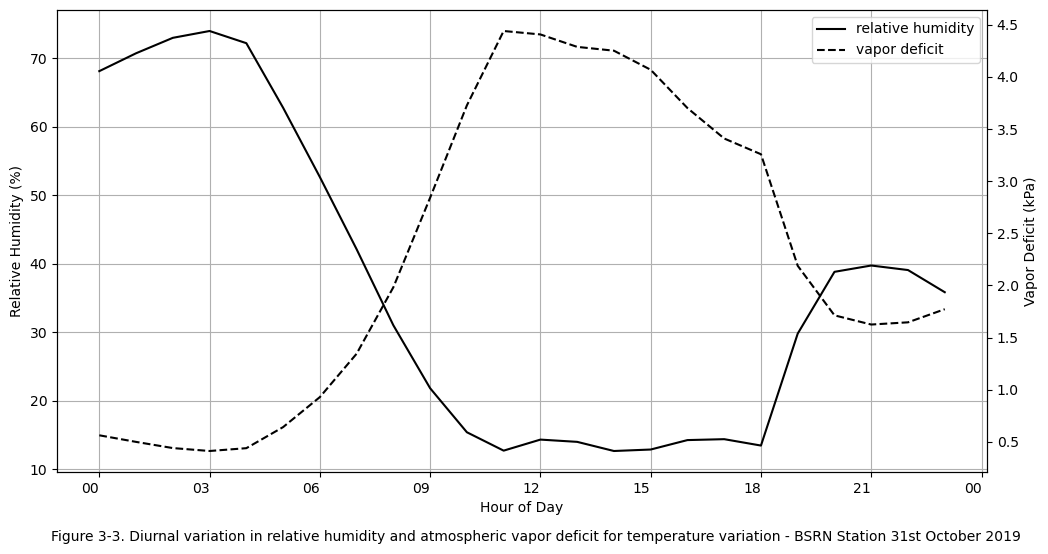

In [29]:
fig4 = plt.figure(figsize=(12,6))


ax = fig4.add_subplot(111)
ln1 = ax.plot(bsrn_vpd_hour['DATE'], bsrn_vpd_hour['RH'], '-', color = 'black', label = 'relative humidity')
ax2 = ax.twinx()
ln2 = ax2.plot(bsrn_vpd_hour['DATE'], bsrn_vpd_hour['VPD'], '--', color = 'black', label = 'vapor deficit')

lns = ln1+ln2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

ax.grid()
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Relative Humidity (%)")
ax2.set_ylabel("Vapor Deficit (kPa)")

txt = ('Figure 3-3. Diurnal variation in relative humidity and atmospheric vapor deficit for temperature variation - BSRN Station 31st October 2019')
plt.figtext(0.12, -0.005, txt)
# Format timestamps
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
plt.setp(ax.get_xticklabels(), fontsize=10, ha='right')
ax.get_xticklabels()

<hr style="border-top: 1px solid gray; margin-top: 24px; margin-bottom: 1px"></hr>